In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv("train.csv")

In [69]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [71]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [72]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [73]:
# Fill in null vaules in the column "Postal Code"
df["Postal Code"].fillna(0, inplace=True)

In [74]:
df["Postal Code"] = df['Postal Code'].astype(int)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int32  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [76]:
# Check for duplicates in the dataset
if df.duplicated().sum() > 0:
    print("There are duplicates in the data")
else:
    print("There are no duplicates")

There are no duplicates


In [77]:
# Customer Segmentation
customer_types = df["Segment"].unique()

### Visualization of the unique customer segments

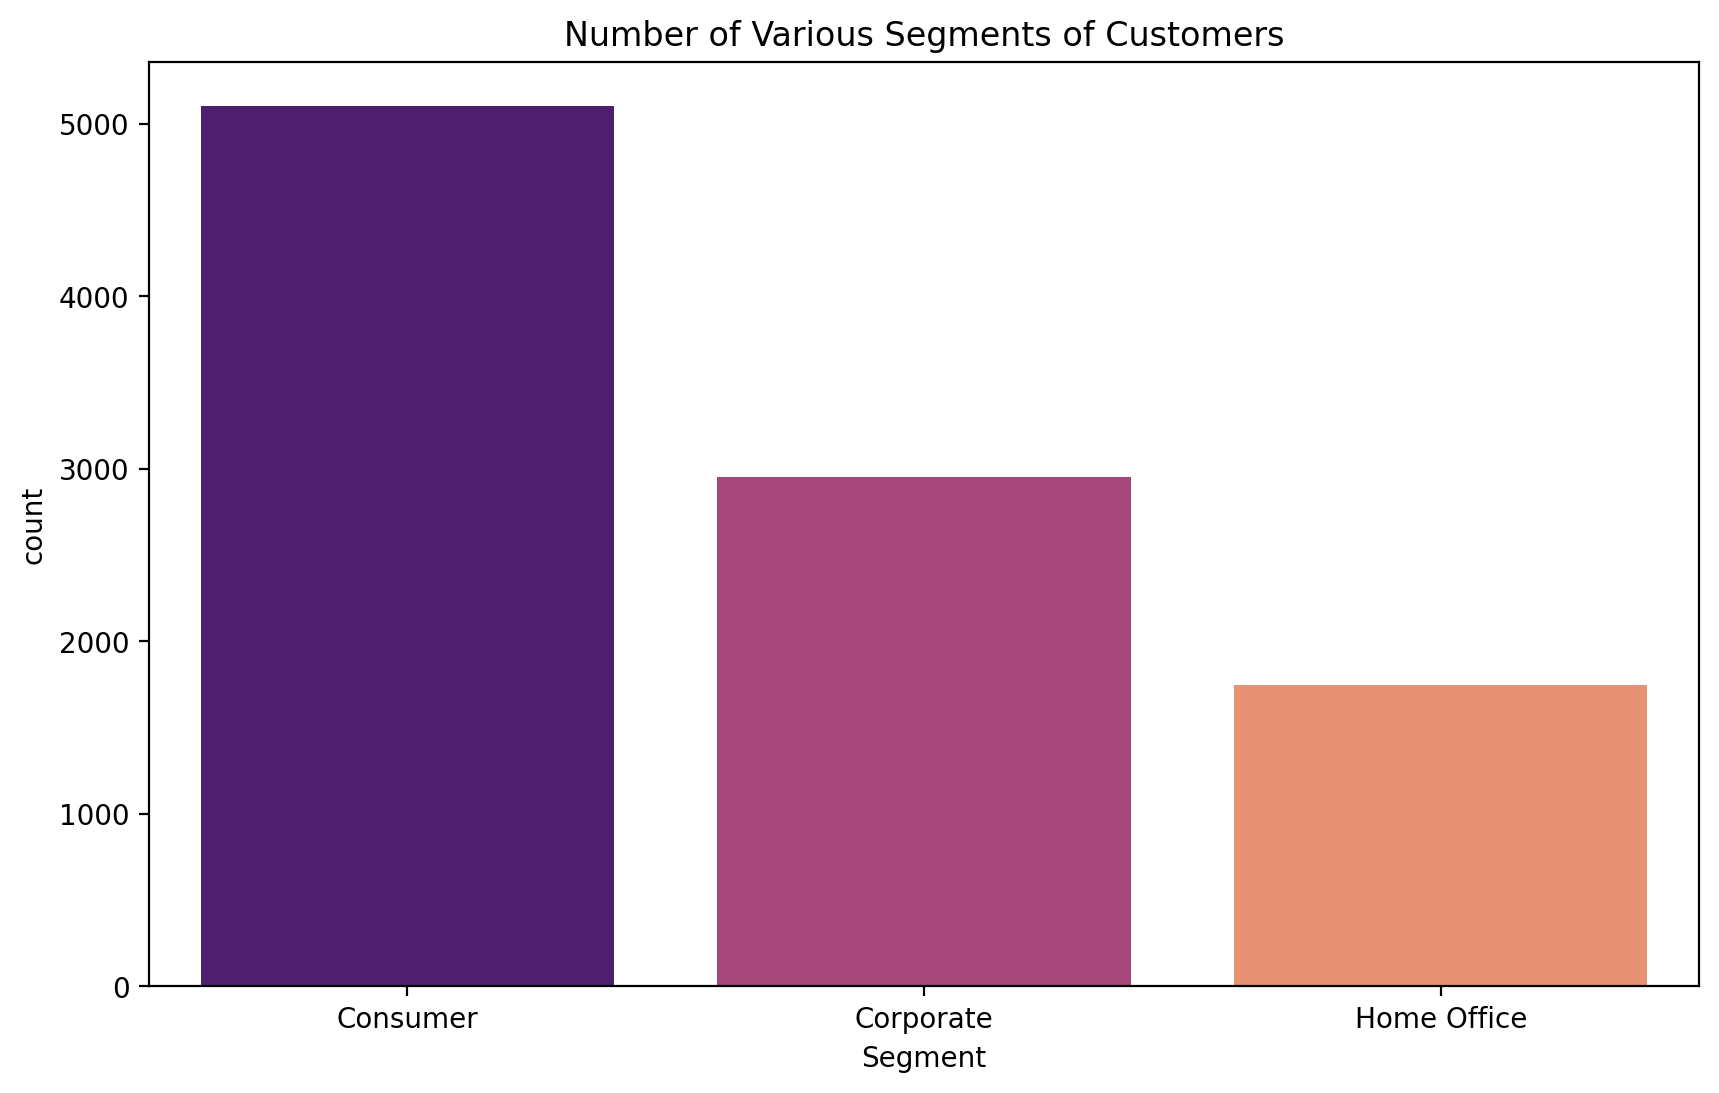

In [78]:
plt.figure(figsize=(10,6),dpi=200)
plt.title("Number of Various Segments of Customers")
sns.countplot(df,x="Segment",palette="magma");

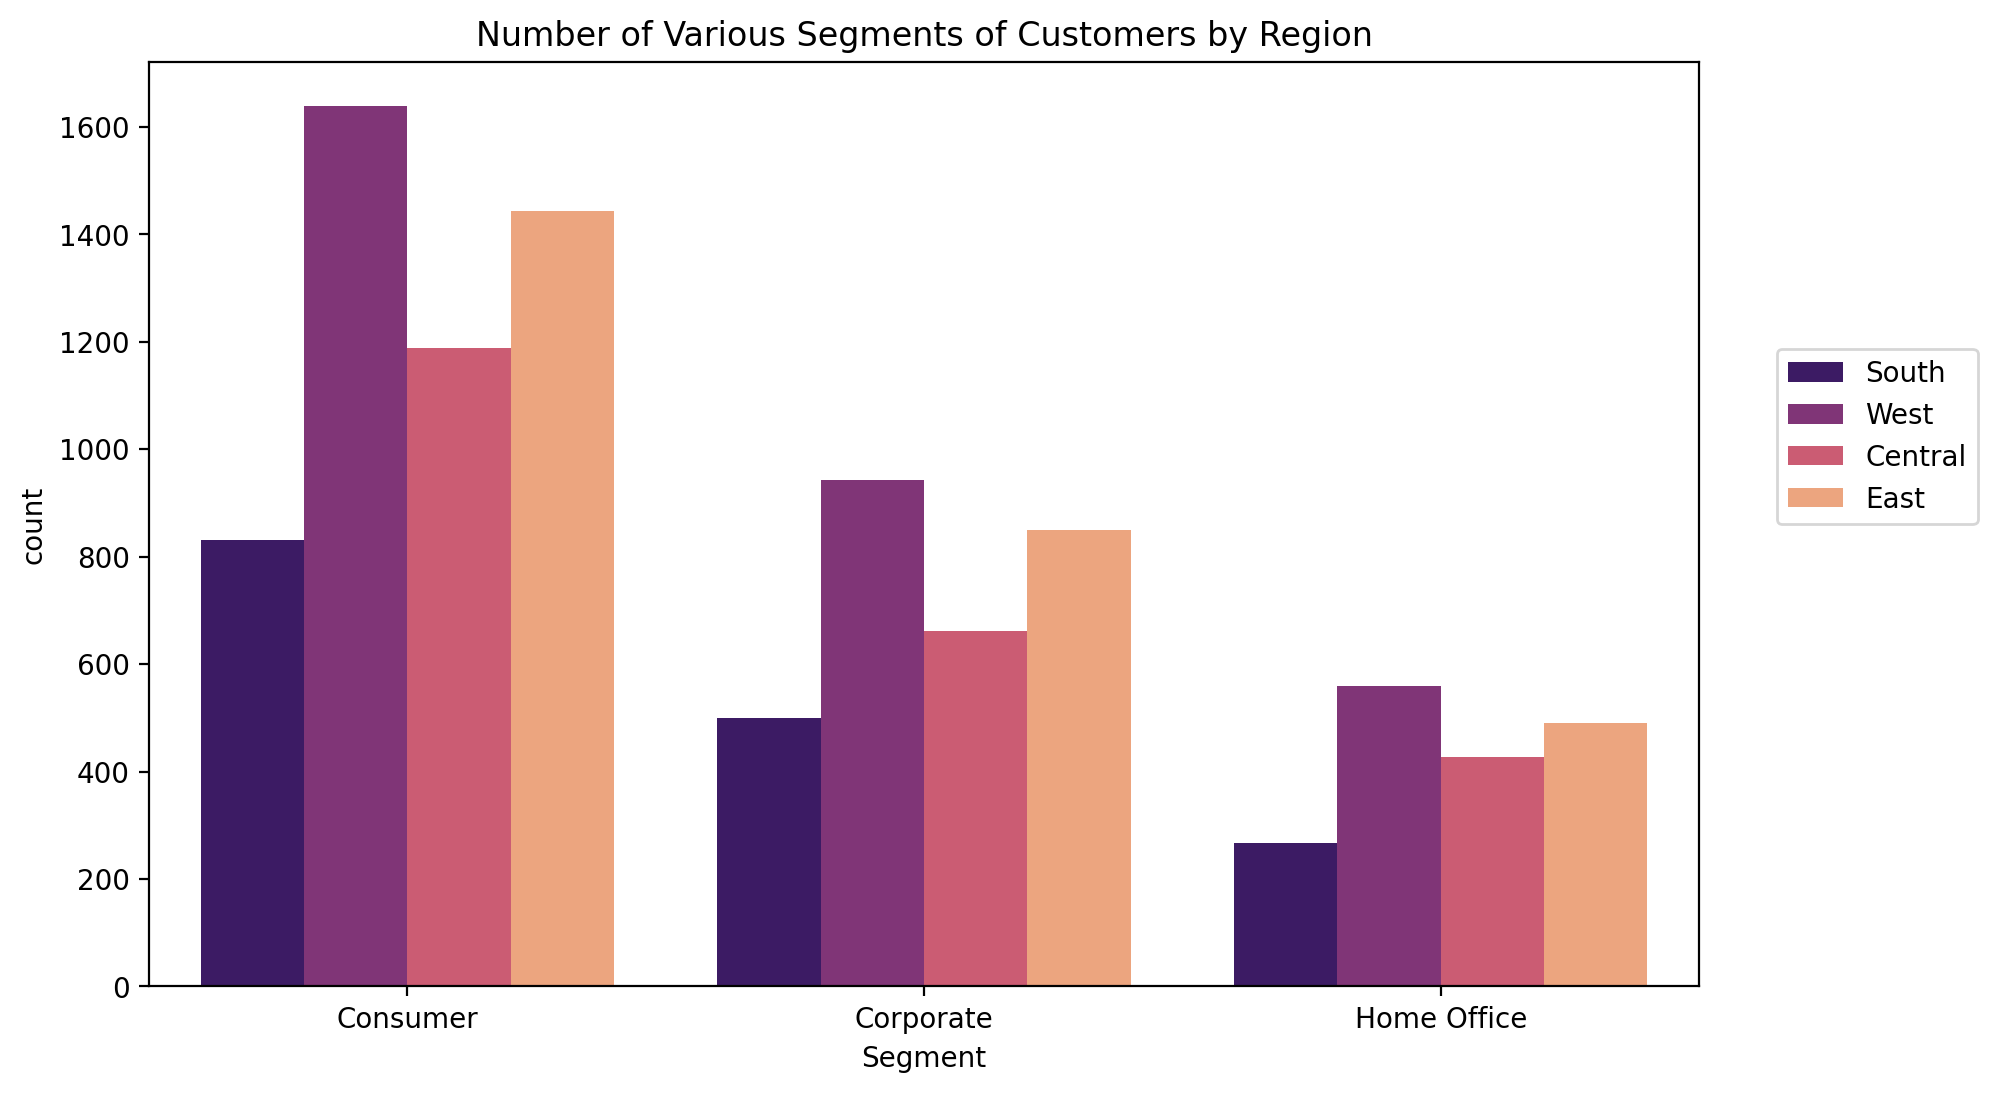

In [79]:
plt.figure(figsize=(10,6),dpi=200)
plt.title("Number of Various Segments of Customers by Region")
sns.countplot(df,x="Segment",palette="magma",hue="Region")

plt.legend(loc=(1.05,.5));

### Visualization of the different customer segments in regards to sales

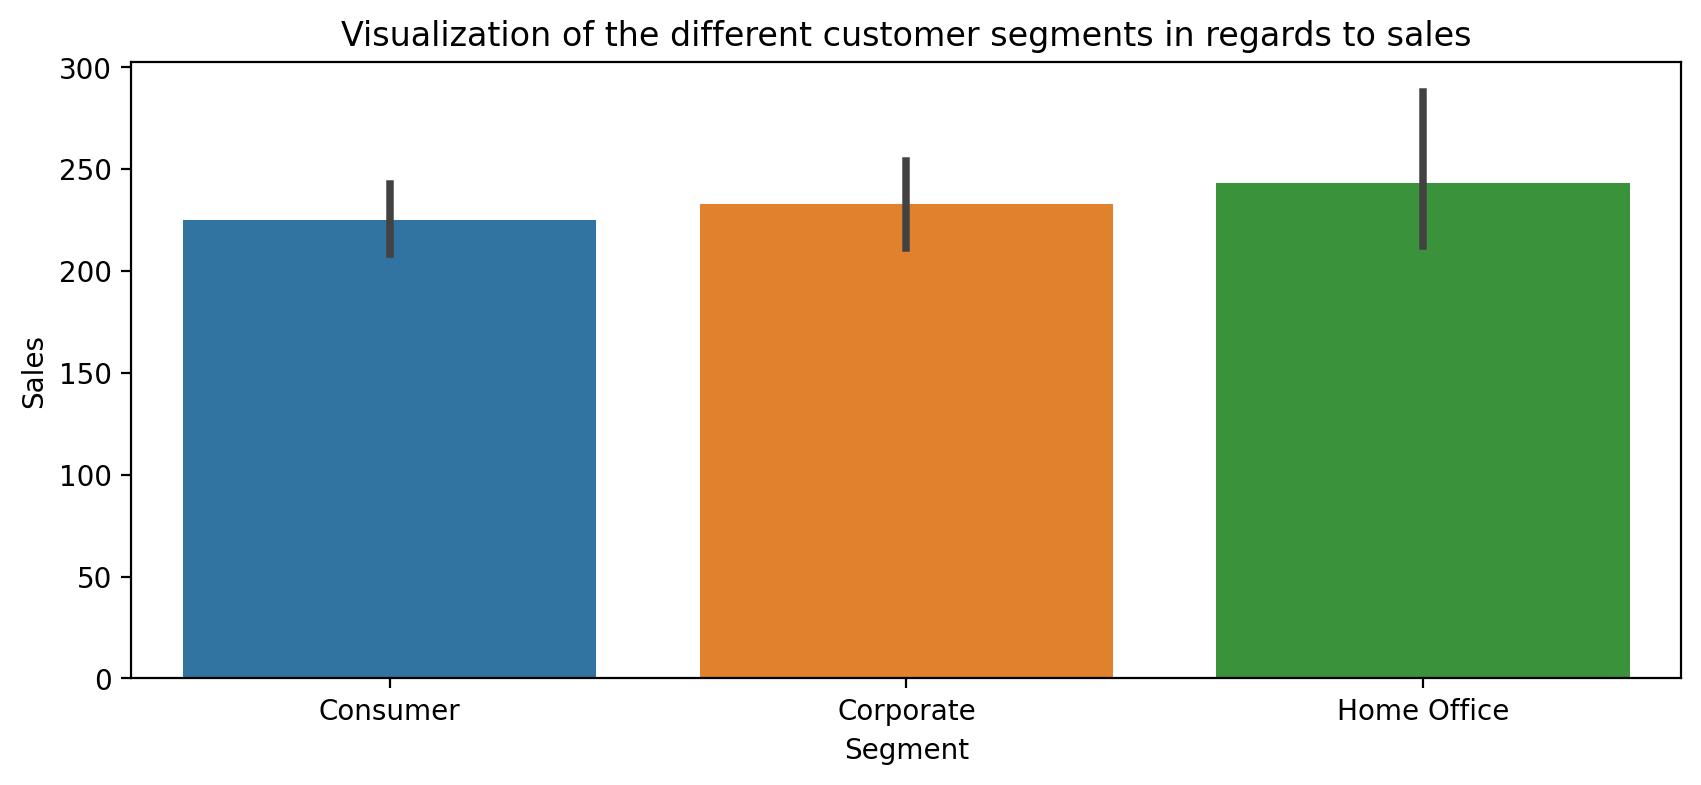

In [80]:
plt.figure(figsize=(10,4),dpi=200)
plt.title("Visualization of the different customer segments in regards to sales")
sns.barplot(data=df,x="Segment",y="Sales");

### Visualization of products sold

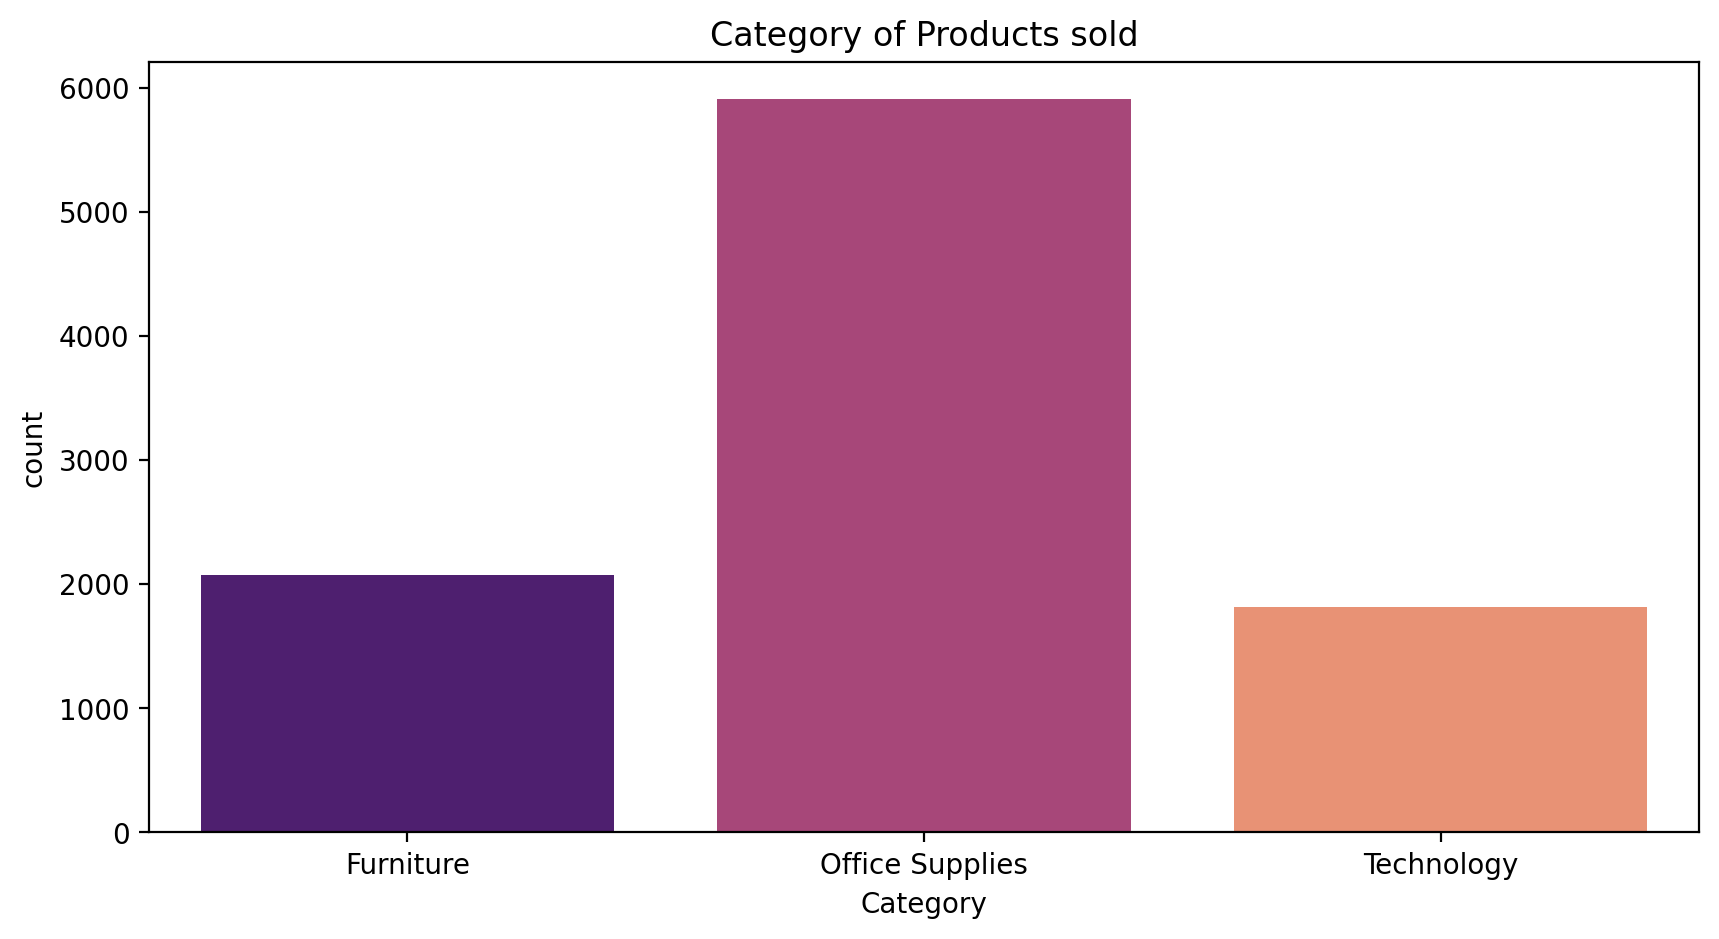

In [81]:
plt.figure(figsize=(10,5),dpi=200)
plt.title("Category of Products sold")
sns.countplot(df,x="Category",palette="magma");

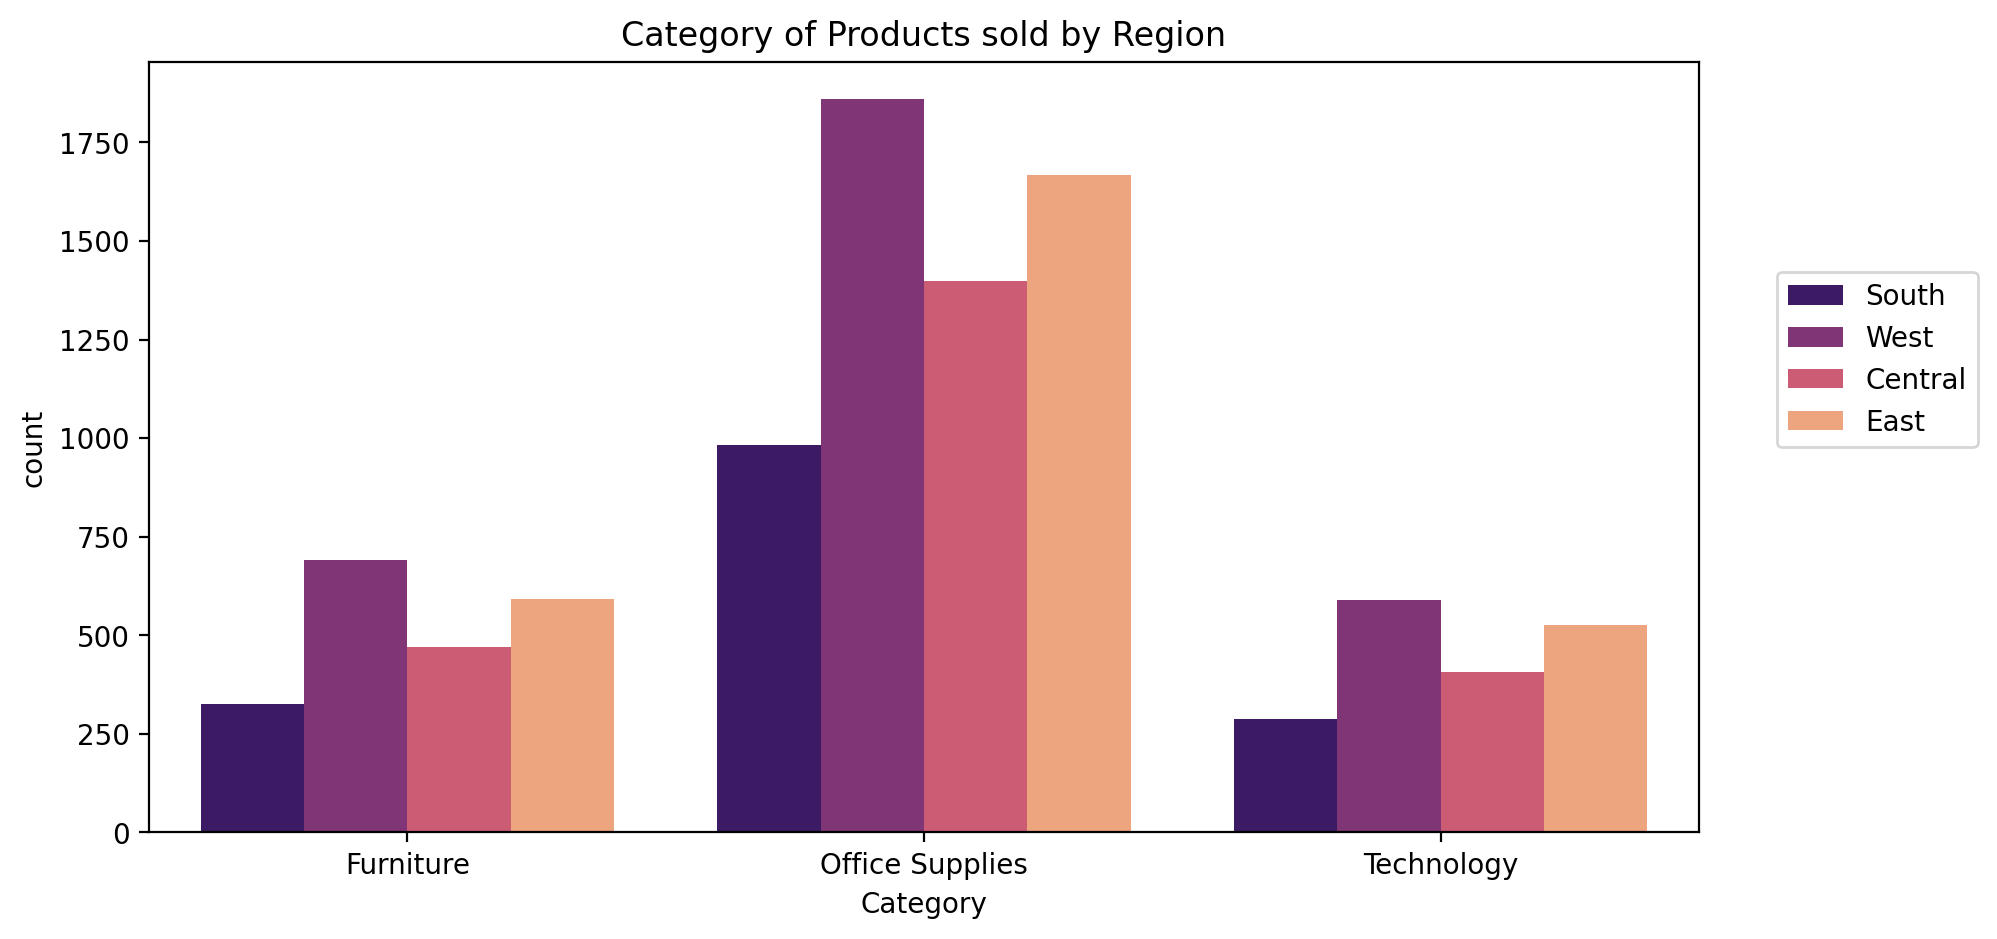

In [82]:
plt.figure(figsize=(10,5),dpi=200)
plt.title("Category of Products sold by Region")
sns.countplot(df,x="Category",hue="Region",palette="magma")

plt.legend(loc=(1.05,.5));

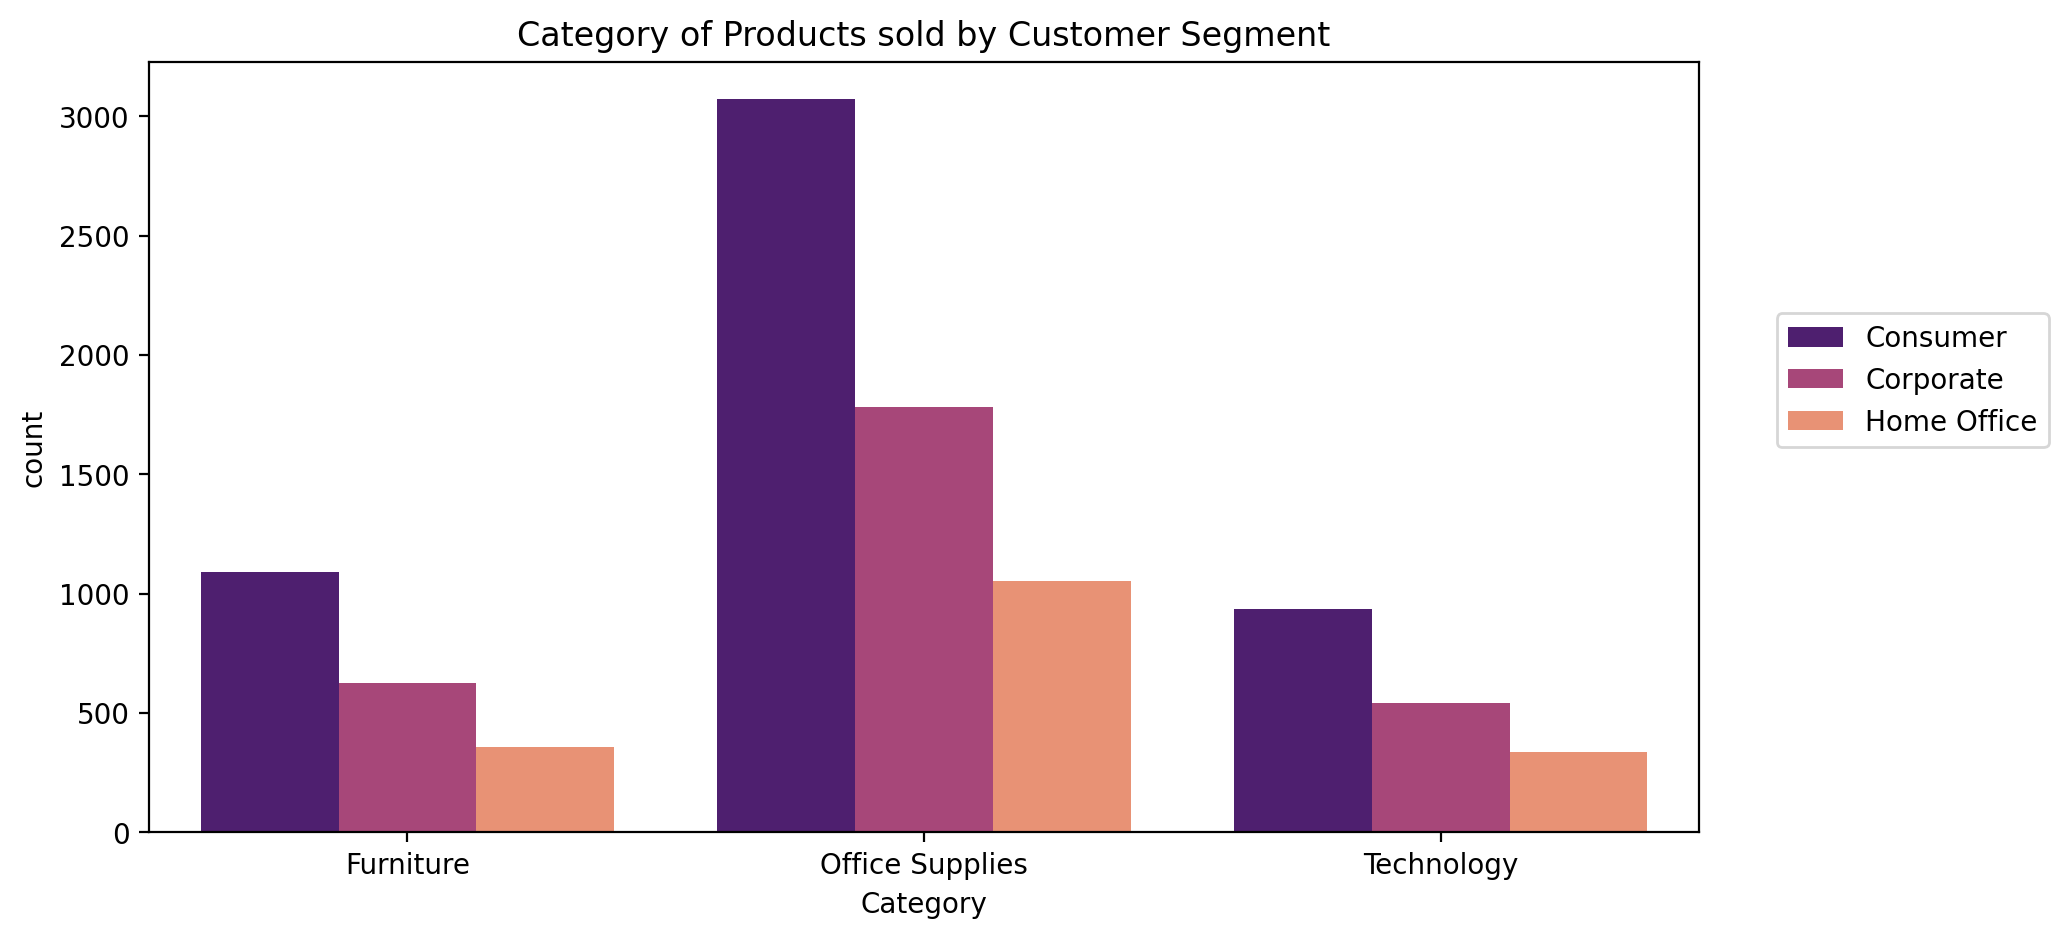

In [83]:
plt.figure(figsize=(10,5),dpi=200)
plt.title("Category of Products sold by Customer Segment")
sns.countplot(df,x="Category",hue="Segment",palette="magma")

plt.legend(loc=(1.05,.5));

### Display customers that have purchased the top 10 most expensive items and 10 cheapest items

In [84]:
# Most expensive Buyers
df.nlargest(n=10,columns="Sales")

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2697,2698,CA-2015-145317,18/03/2015,23/03/2015,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480
6826,6827,CA-2017-118689,02/10/2017,09/10/2017,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950
8153,8154,CA-2018-140151,23/03/2018,25/03/2018,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960
2623,2624,CA-2018-127180,22/10/2018,24/10/2018,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,New York,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968
4190,4191,CA-2018-166709,17/11/2018,22/11/2018,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970
9039,9040,CA-2017-117121,17/12/2017,21/12/2017,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Detroit,Michigan,48205,Central,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740
4098,4099,CA-2015-116904,23/09/2015,28/09/2015,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Minneapolis,Minnesota,55407,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950
4277,4278,US-2017-107440,16/04/2017,20/04/2017,Standard Class,BS-11365,Bill Shonely,Corporate,United States,Lakewood,New Jersey,8701,East,TEC-MA-10001047,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.930
8488,8489,CA-2017-158841,02/02/2017,04/02/2017,Second Class,SE-20110,Sanjit Engle,Consumer,United States,Arlington,Virginia,22204,South,TEC-MA-10001127,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,8749.950
6425,6426,CA-2017-143714,23/05/2017,27/05/2017,Standard Class,CC-12370,Christopher Conant,Consumer,United States,Philadelphia,Pennsylvania,19120,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,8399.976


In [85]:
# Least Expensive Buyers
df.nsmallest(n=10,columns="Sales")

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
4101,4102,US-2018-102288,19/06/2018,23/06/2018,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,Texas,77095,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444
9292,9293,CA-2018-124114,02/03/2018,02/03/2018,Same Day,RS-19765,Roland Schwarz,Corporate,United States,Waco,Texas,76706,Central,OFF-BI-10004022,Office Supplies,Binders,Acco Suede Grain Vinyl Round Ring Binder,0.556
8658,8659,CA-2017-168361,21/06/2017,25/06/2017,Standard Class,KB-16600,Ken Brennan,Corporate,United States,Chicago,Illinois,60623,Central,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,0.836
4711,4712,CA-2015-112403,31/03/2015,31/03/2015,Same Day,JO-15280,Jas O'Carroll,Consumer,United States,Philadelphia,Pennsylvania,19120,East,OFF-BI-10003529,Office Supplies,Binders,Avery Round Ring Poly Binders,0.852
2106,2107,US-2015-152723,26/09/2015,26/09/2015,Same Day,HG-14965,Henry Goldwyn,Corporate,United States,Mesquite,Texas,75150,Central,OFF-BI-10003460,Office Supplies,Binders,Acco 3-Hole Punch,0.876
7548,7549,CA-2015-103492,10/10/2015,15/10/2015,Standard Class,CM-12715,Craig Molinari,Corporate,United States,Huntsville,Texas,77340,Central,OFF-BI-10004140,Office Supplies,Binders,Avery Non-Stick Binders,0.898
8033,8034,CA-2016-119690,25/06/2016,28/06/2016,First Class,MV-17485,Mark Van Huff,Consumer,United States,Houston,Texas,77041,Central,OFF-BI-10000201,Office Supplies,Binders,"Avery Triangle Shaped Sheet Lifters, Black, 2/...",0.984
2761,2762,CA-2018-126536,12/10/2018,14/10/2018,First Class,NK-18490,Neil Knudson,Home Office,United States,San Francisco,California,94110,West,TEC-AC-10003709,Technology,Accessories,Maxell 4.7GB DVD-R 5/Pack,0.990
8024,8025,CA-2015-129189,21/07/2015,25/07/2015,Standard Class,HM-14860,Harry Marie,Corporate,United States,Dallas,Texas,75217,Central,OFF-BI-10000494,Office Supplies,Binders,Acco Economy Flexible Poly Round Ring Binder,1.044
976,977,US-2018-100209,09/07/2018,15/07/2018,Standard Class,TD-20995,Tamara Dahlen,Consumer,United States,Portland,Oregon,97206,West,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,1.080


### Display the customer that has placed the most orders

In [86]:
df.value_counts("Customer ID")

Customer ID
WB-21850    35
PP-18955    34
MA-17560    34
JL-15835    33
CK-12205    32
            ..
SC-20845     1
LD-16855     1
JR-15700     1
RE-19405     1
CJ-11875     1
Name: count, Length: 793, dtype: int64

In [87]:
# The highest number of orders belongs to the customer with an ID of "WB-21850"
# This ID can be used to get the customer's info
df[df["Customer ID"] == "WB-21850"]["Customer Name"].head(1)

2133    William Brown
Name: Customer Name, dtype: object

### Visualization of different modes of shipping by customer segment and product category

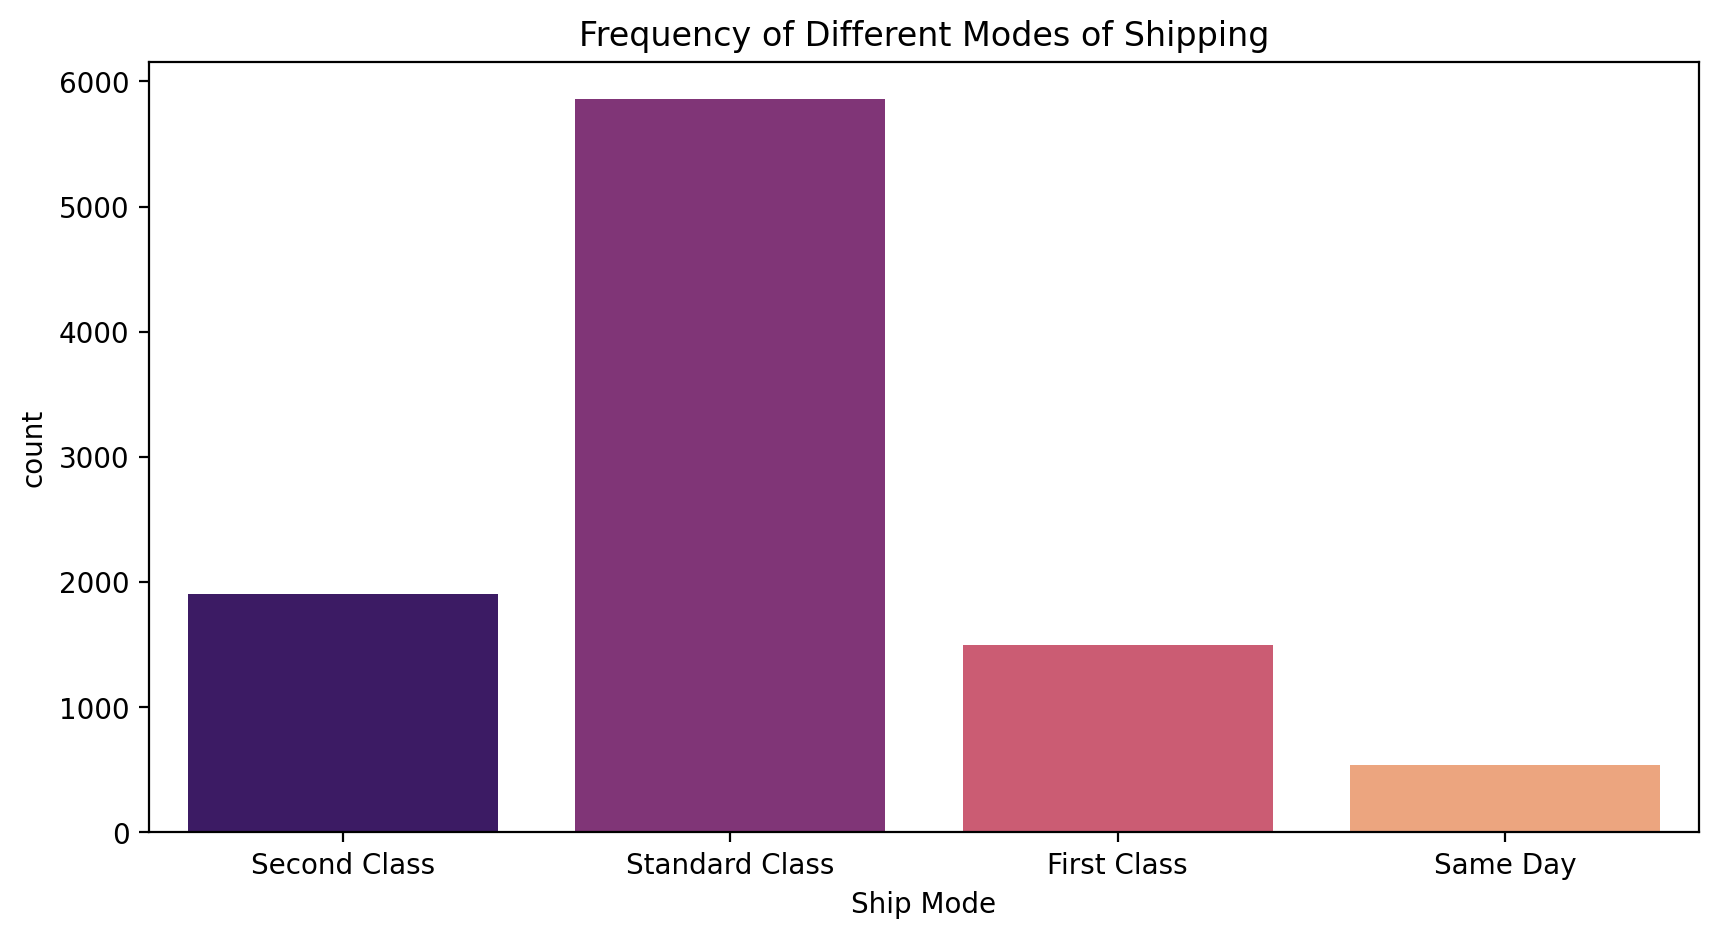

In [88]:
plt.figure(figsize=(10,5),dpi=200)
plt.title("Frequency of Different Modes of Shipping")
sns.countplot(df,x="Ship Mode",palette="magma");

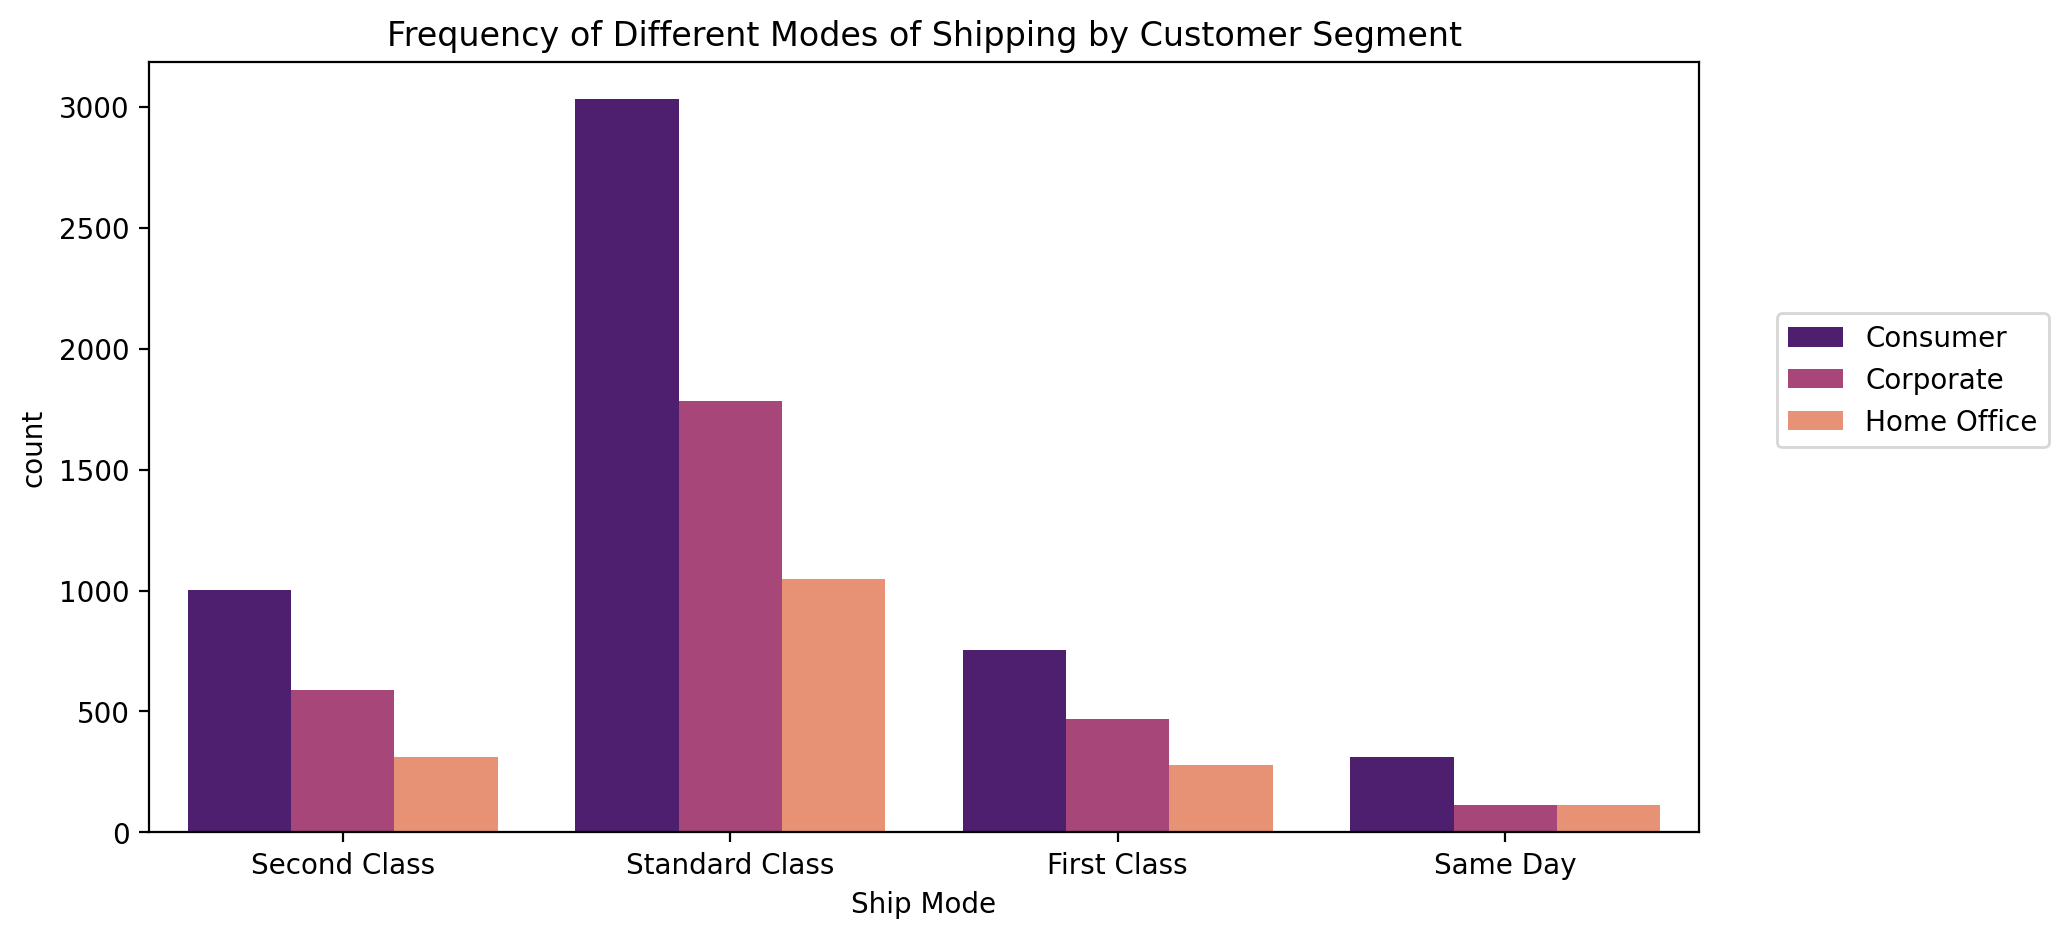

In [89]:
plt.figure(figsize=(10,5),dpi=200)
plt.title("Frequency of Different Modes of Shipping by Customer Segment")
sns.countplot(df,x="Ship Mode",hue="Segment",palette="magma")

plt.legend(loc=(1.05,0.5));

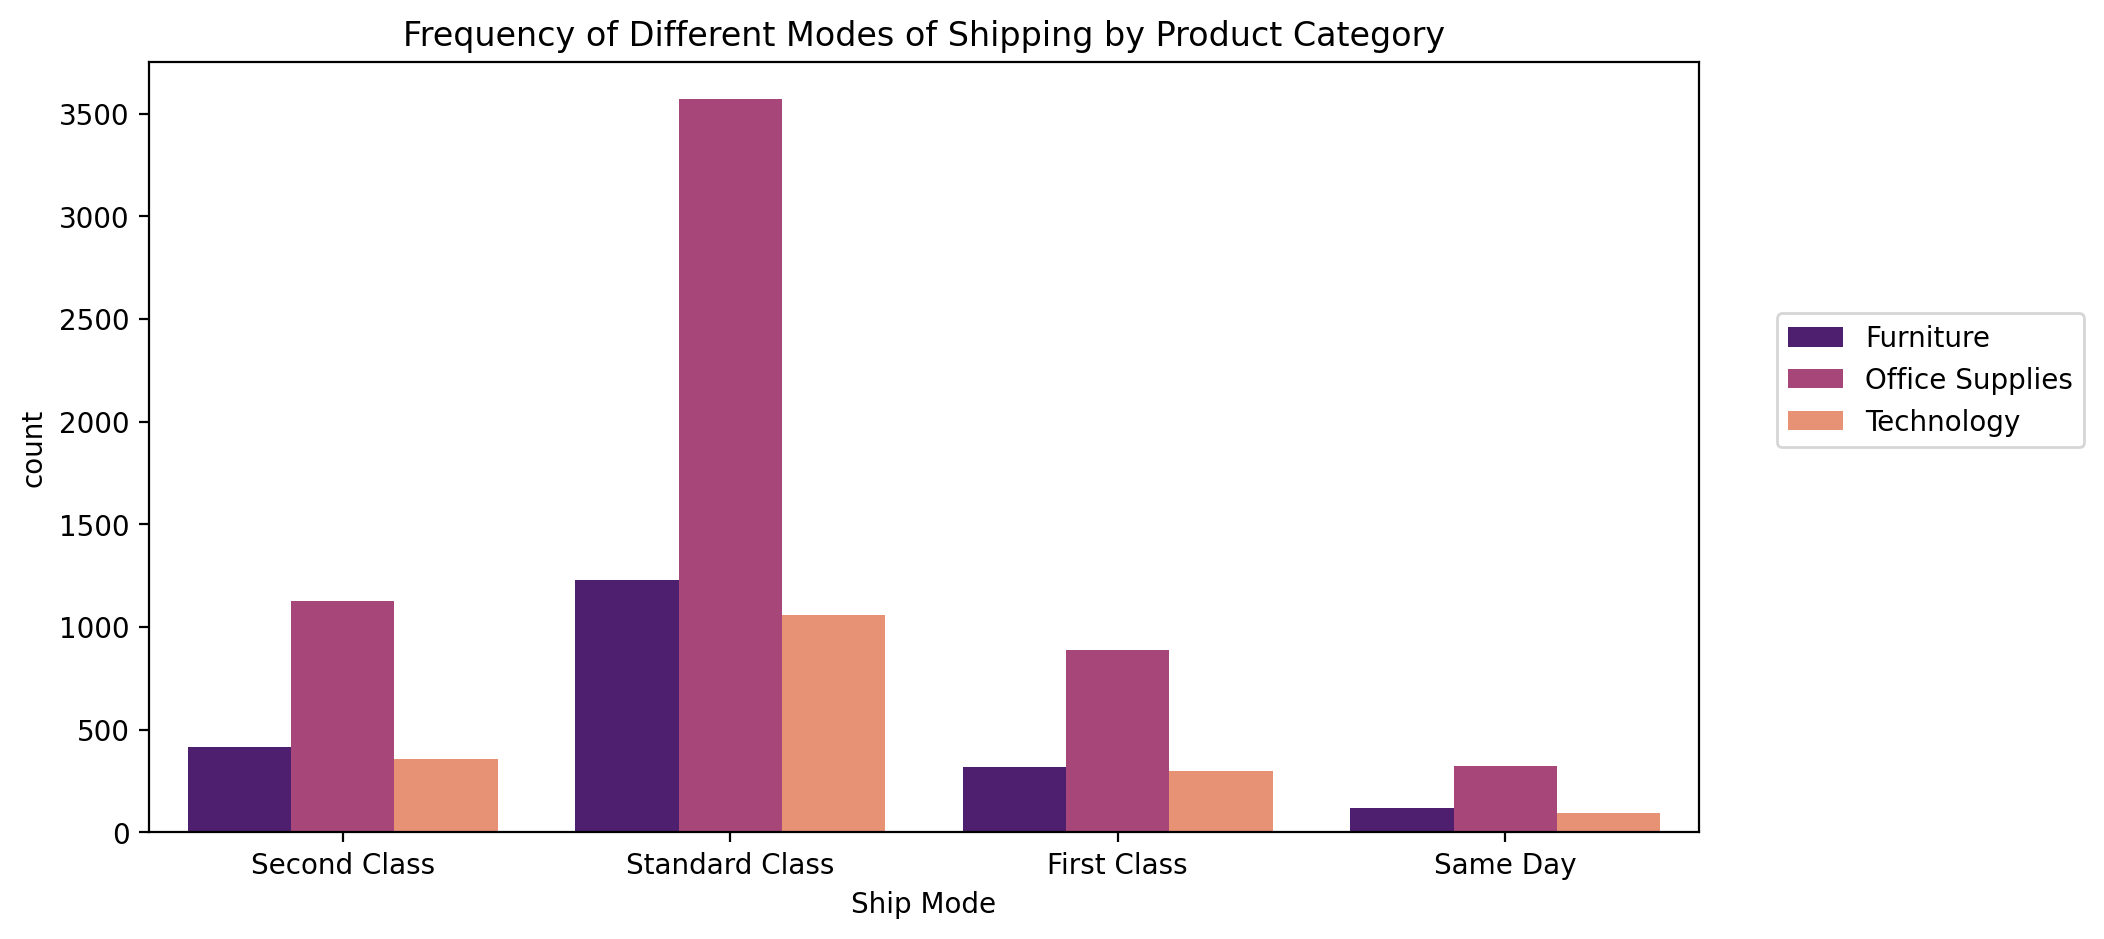

In [90]:
plt.figure(figsize=(10,5),dpi=200)
plt.title("Frequency of Different Modes of Shipping by Product Category")
sns.countplot(df,x="Ship Mode",hue="Category",palette="magma")

plt.legend(loc=(1.05,0.5));

### Breakdown of Customer Purchases by State and City

In [91]:
# Number of customer purchases by state
df.value_counts("State")

State
California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
New Jersey               122
Oregon                   122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 41
Nevada  

In [92]:
# Number of customer purchases by city (Top 10)
df.value_counts("City").head(10)

City
New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
Houston          374
Chicago          308
Columbus         221
San Diego        170
Springfield      161
Name: count, dtype: int64